In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
from timeit import default_timer as timer

In [ ]:
np.random.seed(1000)
A = np.random.randn(1000,10)

In [ ]:
x_bar = np.zeros(10)
x_bar = x_bar.reshape(10,1)

np.random.seed(10)

for i in range(0,10,2):
  x_bar[i] = np.random.uniform(-i-2,-i-1)
for j in range(1,10,2):
  x_bar[j] = np.random.uniform(j+1,j+2)

In [ ]:
np.random.seed(1000)
ep = np.random.randn(1000,1)

In [ ]:
y = np.matmul(A,x_bar) + ep

**Q 1**

In [ ]:
def evalf(x):  
  assert type(x) is np.ndarray   
  fx = np.linalg.norm(np.matmul(A,x) - y)
  fx = 0.5*(fx)**2

  return fx

In [ ]:
evalf(np.zeros(10))

241240397.2062964

In [ ]:
def evalg(x):
  assert type(x) is np.ndarray

  return np.matmul(A.T, np.matmul(A, x) - y)

In [ ]:
def evalh(x):
  assert type(x) is np.ndarray

  return np.matmul(A.T,A)

In [ ]:
def compute_steplength_backtracking_scaled_direction(x, gradf, direction, alpha_start, rho, gamma):
  assert type(x) is np.ndarray
  assert type(gradf) is np.ndarray
  assert type(direction) is np.ndarray
  assert type(alpha_start) is float and alpha_start>=0.
  assert type(rho) is float and rho>=0.
  assert type(gamma) is float and gamma>=0.
  
  alpha = alpha_start
  while evalf(x+alpha*direction)>evalf(x)+gamma*alpha*np.matmul(gradf.T,direction):
    alpha=rho*alpha

  return alpha

In [ ]:
def find_minimizer_newtons(start_x, tol, *args):
  assert type(start_x) is np.ndarray 
  assert type(tol) is float and tol>=0 

  x = start_x
  n = x.shape[0]
  g_x = evalg(x)

  x_k_list =[]

  alpha_start = args[0]
  rho = args[1]
  gamma = args[2]

  k=0
  while (np.linalg.norm(g_x) > tol):
    D_k = np.linalg.inv(evalh(x))
    p_k = -np.matmul(D_k, g_x)
    step_length = compute_steplength_backtracking_scaled_direction(x, g_x, p_k, alpha_start, rho, gamma)
  
    x = np.add(x,np.multiply(step_length,p_k))
    x_k_list.append(x)
    k += 1 
    g_x = evalg(x)
  return x, evalf(x), k, x_k_list

In [ ]:
time_start1 = timer()
minimizer1,fn1,iter1, x_k_list1 = find_minimizer_newtons(np.zeros(10).reshape(10,1), 1e-5, 0.99, 0.5, 0.5)
time_end1   = timer()

In [ ]:
print('x* = ',minimizer1)
print()
print('x_bar = ',x_bar)

x* =  [[-1.2499482 ]
 [ 2.2508644 ]
 [-3.96509013]
 [ 4.20044946]
 [-5.30747951]
 [ 6.75406566]
 [-7.25964815]
 [ 8.19990441]
 [-9.46332624]
 [10.16898387]]

x_bar =  [[-1.22867936]
 [ 2.22479665]
 [-3.97924805]
 [ 4.19806286]
 [-5.36635177]
 [ 6.76053071]
 [-7.25119612]
 [ 8.16911084]
 [-9.50149299]
 [10.08833981]]


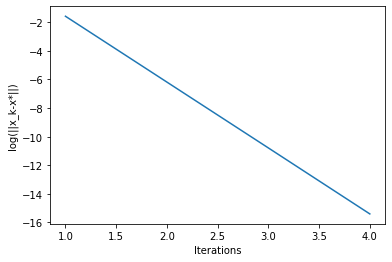

In [ ]:
lg = [math.log(np.linalg.norm(x_k_list1[i]-minimizer1)) for i in range(iter1-1)]

plt.plot([k+1 for k in range(iter1-1)], lg)
plt.xlabel('Iterations')
plt.ylabel('log(||x_k-x*||)')
plt.show()

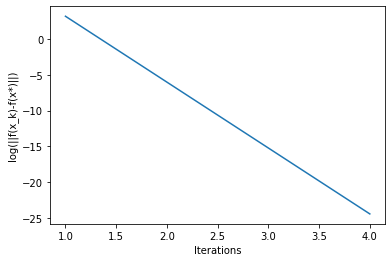

In [ ]:
lg_f =[math.log(abs(evalf(x_k_list1[i]) - evalf(minimizer1))) for i in range(iter1-1)]

plt.plot([k+1 for k in range(iter1-1)], lg_f)
plt.xlabel('Iterations')
plt.ylabel('log(||f(x_k)-f(x*)||)')
plt.show()

$\frac{||x^{k+1} − x^∗||}{||x^k − x^∗||}≤ r$

Taking log both sides we get $log(||x^{k+1} − x^∗||)-log(||x^{k} − x^∗||) < log(r)$, where 0<r<1. 

The convergence rate for both is Q-Linear as the $log(||x^k - x^*||)$ is decreasing linearly wrt k and we can always get an 0<r<1 for all -ve numbers k s.t log(r) >= k 

**Q 3**

In [ ]:
#code for BFGS method to find the minimizer
def find_minimizer_BFGS(start_x, tol, B_k, *args):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 

  n = len(start_x)
  x = start_x.reshape((n,1))
  g_x = evalg(x)
  x_k_list=[]
  #initialization for backtracking line search
  alpha_start = args[0]
  rho = args[1]
  gamma = args[2]

  k=0
  while (np.linalg.norm(g_x) > tol):
    p_k = -np.matmul(B_k, g_x)
    step_length = compute_steplength_backtracking_scaled_direction(x, g_x, p_k, alpha_start, rho, gamma)

    x_k = x
    s_k = np.multiply(step_length,p_k)
    #x = np.add(x, np.multiply(step_length,p_k)) #update x = x + step_length*direction
    x = np.add(x, s_k)#s_k = x - x_k
    y_k = evalg(x)-evalg(x_k)
    s_yT = np.matmul(s_k,y_k.T)
    y_sT = np.matmul(y_k, s_k.T)
    u_k = 1/(np.matmul(y_k.T,s_k))
    term_11 = np.subtract(np.identity(n) , u_k*s_yT)
    term_13 = np.subtract(np.identity(n) , u_k*y_sT)
    B_k = np.matmul(term_11,np.matmul(B_k,term_13)) + u_k*np.matmul(s_k,s_k.T)
    
    x_k_list.append(x)
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point

  return x, evalf(x), k, x_k_list

In [ ]:
B_k = np.identity(10)/10

time_start2 = timer()
minimizer2,fn2,iter2,x_k_list2 = find_minimizer_BFGS(np.zeros(10).reshape(10,1), 1e-5, B_k, 0.99, 0.5, 0.5)
time_end2   = timer()

In [ ]:
print('x* = ',minimizer2)
print()
print('x_bar = ',x_bar)

x* =  [[-1.2499482 ]
 [ 2.2508644 ]
 [-3.96509013]
 [ 4.20044946]
 [-5.30747951]
 [ 6.75406566]
 [-7.25964814]
 [ 8.1999044 ]
 [-9.46332624]
 [10.16898386]]

x_bar =  [[-1.22867936]
 [ 2.22479665]
 [-3.97924805]
 [ 4.19806286]
 [-5.36635177]
 [ 6.76053071]
 [-7.25119612]
 [ 8.16911084]
 [-9.50149299]
 [10.08833981]]


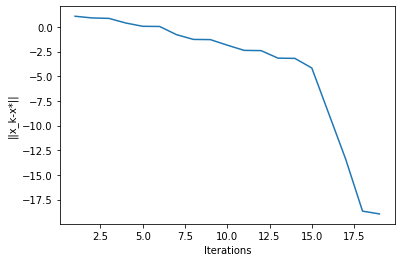

In [ ]:
lg2 = [math.log(np.linalg.norm(x_k_list2[i]-minimizer2)) for i in range(iter2-2)]
plt.plot([k+1 for k in range(iter2-2)], lg2)
plt.xlabel('Iterations')
plt.ylabel('log||x_k-x*||')
plt.show()

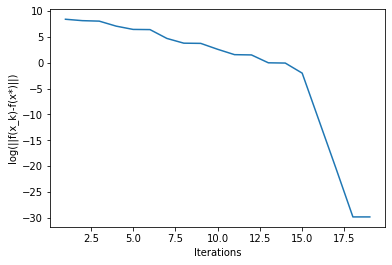

In [ ]:
lg_f2 =[math.log(abs(evalf(x_k_list2[i]) - evalf(minimizer2))) for i in range(iter2-2)]

plt.plot([k+1 for k in range(iter2-2)], lg_f2)
plt.xlabel('Iterations')
plt.ylabel('log(||f(x_k)-f(x*)||)')
plt.show()

Here, the convergence rate for both is Q-linear as ln(||x_k+1 - x* ||) - ln(x_k- x*) is negative and there exists c in (0,1) for all negative numbers k s.t. ln(c) >= k.

**Q 4**

In [ ]:
print("Time taken by Newtons method:",time_end1-time_start1)
print("Time taken by BFGS Method:",time_end2-time_start2)

Time taken by Newtons method: 0.008353252998858807
Time taken by BFGS Method: 0.01809835299900442


here, BFGS is taking more time as compared to Newtons method.